# Data Analysis of 2019 Stack Overflow Survey

## Introduction

1. What is the context of the work? 
___
The following project is an analysis of the results of an annual survey conducted by Stack Overflow on its most engaged contributors and participants. The dataset I am working with is the results from Stack Overflow's 2019 survey. 

I start by analysing the trends in the developer community of Stack Overflow, and notice some trends based on historgrams, and bar graphs. As an aspiring data scientist, I move on to explore the trends in their community. 

Thus, after some initial exploration of the trends in the developer community, I drill down to analyse the differences in the trends between data scientists and non-data scientists.

"survey.csv" is the full, cleaned results of the 2019 Stack Overflow Developer Survey provided by the platform at [this](https://drive.google.com/open?id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV) URL.
___

2. What research question are you trying to answer? 
___
I intend on studying the patterns in the developer, and more specifically, the data science community. At a high level, my main goal in the first part of the analysis is to identify trends in the developer community of Stack Overflow, provide insights into what's popular, what isn't, the demand of new and growing technologies, developers' persepectives on practices of the community, and the success and satisfaction rate among developers. But, more specifically, I intend to discover the differences in trends between data scientists and non-data scientists, which I do in the second part. The key questions I am looking to answer through an analysis of this dataset are:

* What are some clearly identifiable trends in the developer community?
* What is the gender distribution between Data Scientists and Non-data Scientists?
* What is the age distribution between Data Scientists and Non-data Scientists?
* What is the education level distribution between Data Scientists and Non-data Scientists?
* What is the distribution of undergraduate majors between Data Scientists and Non-data Scientists?
* What programming languages do data scientists favor and how do they differ from those used by non-data scientists?
* How much coding experience do data scientists have compared to non-data scientists?
* Are Data Scientists more satisfied with their jobs/careers than Non-data Scientists?
* Can we predict the salary of Data Scientists?¶

By answering these questions, I hope to give any aspiring developer or data scientist an insight into what the most valuable skills are, how one should prepare him/herself for a career in the field, and what some of the characteristics, and practices are on the job.
___
3. What are your main findings? 

    * Certain technologies (programming languages, web frameworks, etc), and skills become all the rage in any given period of time, (~ 5-7 years).
    * Other aspects such as code review practices, coding as a hobby, etc., remain more or less stable.

Comparing differences between data scientists and non-data scientists, we find that:
* The distribution of gender is approximately even
* Data scientists seem to be older than other developers
* Data scientists are more likely to have continued their education beyond an undergraduate degree
* Majority of data scientists have a background in Computer Science as an undergraduate
* Python and R are the most popular languages among data scientists while JavaScript is the most popular among other developers
* Data scientists have more years of professional coding experience than non-data scientists
* They also seem o be more satisfied with their jobs, likely because of the higher pay compared to other developers
* However, given all these factors, it is still hard to predict the salary of a data scientist based on this dataset and based on factors that we deem to be determinants of compensation

## Data Description 

1. What are the observations (rows) and the attributes (columns)?
___
Each observation (row) corresponds to a qualifying responder. Each attribute (column) corresponds to a question on the survey.
___
2. Why was this dataset created?
___
Stack Overflow’s annual Developer Survey is the largest and most comprehensive survey of people who code around the world. It is simply an annual practice of the platform to gather data on their users to identify trends in the community and improve their platform with the help of the results they find and feedback they receive. Each year, Stack Overflow fields this survey covering everything from developers’ favorite technologies to their job preferences. 2019 marked the ninth year they’ve published their annual Developer Survey results, and nearly 90,000 developers took the 20-minute survey earlier that year. The survey was fielded from January 23 to February 14, 2019.
___
3. Who funded the creation of the dataset?
___
Stack Overflow
___
4. What processes might have influenced what data was observed and recorded and what was not?
___
Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. "survey.csv" contains the results of a survey of 88,883 software developers from 179 countries around the world.

The survey wasn't accessible to the entire world in 2019. Traffic from Crimea, Cuba, Iran, North Korea, and Syria was blocked by Stack Overflow's third party survey software due to United States transport/export sanctions at the time, although some respondents used VPNs to avoid this.
___
5. What preprocessing was done, and how did the data come to be in the form that you are using?
___
Stack Overflow only states that the current form of the data is the full "cleaned" results of the survey. What sort of preprocessing or cleaning processes were made use of are undisclosed.
___
6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
___
Yes, the people were aware of the data collection since this was a survey in which particpation was completely voluntary. 

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

As an incentive, respondents who finished the survey could opt in to a "Census" badge if they completed the survey.
___
7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
___
[Raw source data](https://cornell.box.com/s/oycokpi6x056bhxgma8r3wthiobvduis)
___

_Information source: [Stack Overflow](https://insights.stackoverflow.com/survey/2019)._

## Data Analysis

* Use summary functions like mean and standard deviation along with visual displays like scatter plots and histograms to describe data.
* Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.

### Data Collection

Loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import warnings
from collections import Counter
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore')

Reading CSV file of the results

In [2]:
# reading csv file of survey results
results = pd.read_csv("survey.csv")

results.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


### Data Wrangling

What are the attributes (columns)?

In [3]:
print("The attributes (columns) of the dataset are:\n\n", list(results))

The attributes (columns) of the dataset are:

 ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'Sc

What do the column names mean?

In [4]:
# reading schema of the survey results table as a csv file
schema = pd.read_csv("Stack-Overflow-Survey-Details-2019/survey_results_schema.csv")

schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...




The full schema can be found in the folder "Stack-Overflow-Survey-Details-2019" in the file named "survey_results_schema.csv". It was provided by Stack Overflow at [this](https://drive.google.com/open?id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV) URL.



How many responses over how many attributes are we dealing with?

In [5]:
# how many responses over how many attributes are we dealing with?
print("Number of responses:",results.shape[0])
print("Number of atrributes:",results.shape[1])

Number of responses: 88883
Number of atrributes: 85


We don't need all the attributes to carry out our analysis. We get rid of the redundant attributes.

In [6]:
# getting rid of redundant columns
results.drop(columns={'Student','EduOther','OrgSize','Age1stCode','MgrIdiot','MgrMoney','MgrWant','JobSeek','LastHireDate','LastInt','JobFactors','ResumeUpdate','CompFreq','WorkRemote','ImpSyn','UnitTests','PurchaseHow','PurchaseWhat','OffOn','SocialMedia','Extraversion','ScreenName','SOVisit1st','SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime','SOAccount','SOPartFreq','SOJobs','EntTeams','SOComm','SONewContent','Dependents','SurveyLength','SurveyEase','FizzBuzz','CurrencySymbol','WelcomeChange','WorkPlan','WorkChallenge'},inplace=True)

results.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,EdLevel,UndergradMajor,DevType,...,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,Age,Gender,Trans,Sexuality,Ethnicity
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,Primary/elementary school,NaN,NaN,...,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",14.0,Man,No,Straight / Heterosexual,NaN
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,"Developer, desktop or enterprise applications;...",...,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,19.0,Man,No,Straight / Heterosexual,NaN
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Designer;Developer, back-end;Developer, front-...",...,I do not use containers,NaN,NaN,Yes,Yes,28.0,Man,No,Straight / Heterosexual,NaN
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Developer, full-stack",...,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,22.0,Man,No,Straight / Heterosexual,White or of European descent
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Academic researcher;Developer, desktop or ente...",...,"Outside of work, for personal projects",Not at all,NaN,Yes,Also Yes,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial


We managed to get rid of 45 redundant columns. 

_Note: The columns that are discarded might be modified later depending on how the analysis progresses and whether any intereting research questions surface that might be worth exploring._

In [7]:
# how many responses over how many attributes are we dealing with now with the changed dataset?
print("Number of responses:",results.shape[0])
print("Number of atrributes:",results.shape[1])

Number of responses: 88883
Number of atrributes: 43


What are the data types of the attributes of our dataset?

In [8]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 43 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
CurrencyDesc              71392 non-null object
CompTotal                 55945 non-null float64
ConvertedComp             55823 non-null float64
WorkWeekHrs               64503 non-null float64
WorkLoc                  

We now have an idea about how many entries each column has and how to go about manipulating the columns of our dataset.

#### _Q: Are most of the contributors on Stack Overflow Students, Not Developers, Developers, Novices, or Ex-Developers?_

In [9]:
# replacing lengthy responses with descriptive phrases or words
results['MainBranch'].replace({'I am a student who is learning to code':'Student',
                               'I am not primarily a developer, but I write code sometimes as part of my work':'Not Developer',
                               'I am a developer by profession':'Developer', 
                               'I code primarily as a hobby':'Novice',
                               'I used to be a developer by profession, but no longer am':'Ex-Developer'}
                              ,inplace=True)

In [10]:
# creating a new dataframe with only non-null values from the 'mainbranch' column 
mainbranch = results['MainBranch'].dropna()

mainbranch.head()

0          Student
1          Student
2    Not Developer
3        Developer
4        Developer
Name: MainBranch, dtype: object

We plot a histogram to easily visualize and answer our question.

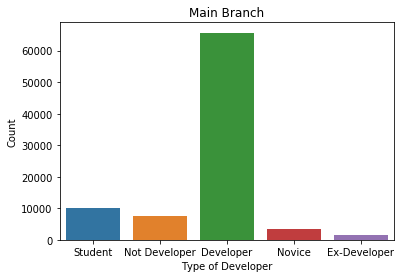

In [11]:
plt.figure()
sns.countplot(x = mainbranch)
plt.xlabel('Type of Developer')
plt.ylabel('Count')
plt.title("Main Branch")
plt.show()

#### _Ans: Evidently, most of the contributors on Stack Overflow are Developers._

Thus, we carry out the rest of our analysis for **Developers** only.

In [12]:
# creating a new dataframe only containing Developer information that we will be working with
developer = results[ results['MainBranch'] == 'Developer' ]

developer.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,EdLevel,UndergradMajor,DevType,...,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,Age,Gender,Trans,Sexuality,Ethnicity
3,4,Developer,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Developer, full-stack",...,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,22.0,Man,No,Straight / Heterosexual,White or of European descent
4,5,Developer,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Academic researcher;Developer, desktop or ente...",...,"Outside of work, for personal projects",Not at all,NaN,Yes,Also Yes,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial
6,7,Developer,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","Designer;Developer, front-end",...,I do not use containers,NaN,"Useful for decentralized currency (i.e., Bitcoin)",No,Yes,42.0,Man,No,Straight / Heterosexual,White or of European descent
8,9,Developer,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","Database administrator;Developer, back-end;Dev...",...,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,23.0,Man,No,Bisexual,White or of European descent
9,10,Developer,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,Data or business analyst;Data scientist or mac...,...,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,NaN,NaN,NaN,NaN,NaN


In [13]:
print("Number of responses (or rows) =",developer.shape[0])

Number of responses (or rows) = 65679


### Data Exploration

In the first section of this analysis, we explore trends in the larger developer community.

#### _Q: What are the most common types of Developers contributing on Stack Overflow?_ 

In [14]:
# splitting `DevType` on ';' 
devtypes = developer[ developer['DevType'].notnull() ]

unique_developers = {}

# splitting the dev types on ;
for developer_set in devtypes['DevType'].apply(lambda row: str(row).split(';')):
    for dev in developer_set:
        if dev not in unique_developers.keys():
            unique_developers[dev] = 1
        else:
            unique_developers[dev] += 1

In [15]:
# function that will be used for plotting bar graphs horizontally
def plot_dim_count(unique_dim_dict, plot_title):
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient = 'index', dtype = None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count', ascending = True, inplace = True)
    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

We plot a bar graph to easily visualize and answer our question.

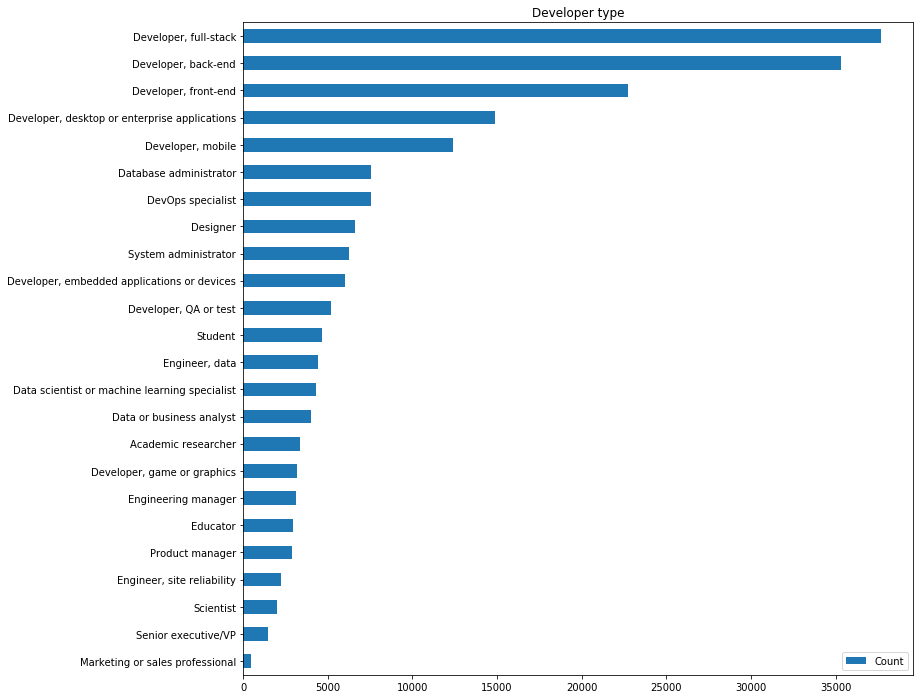

In [16]:
# plotting a bar graph
plot_dim_count(unique_developers, 'Developer type')

#### _Ans: Full-stack, back-end, and front-end developers seem to be the most common kinds of contributors on Satck Overflow._ 

#### _Q: Do most Developers love coding or merely do it as part of their job?_

We plot a histogram to easily visualize and answer our question.

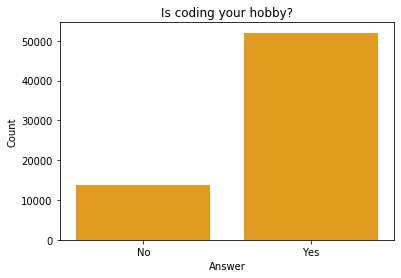

In [17]:
sns.countplot(x = 'Hobbyist', data = developer, color = "Orange")
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title("Is coding your hobby?")
plt.show()

#### _Ans: Most Developers do love to code as a hobby._ 

#### _Q: What is the programming language of choice for Developers?_ 

In [18]:
# splitting `LanguageWorkedWith` on ';' 
languages = developer[ developer['LanguageWorkedWith'].notnull() ]

unique_languages = {}

# splitting the languages on ;
for language_set in languages['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

We plot a bar graph to easily visualize and answer our question.

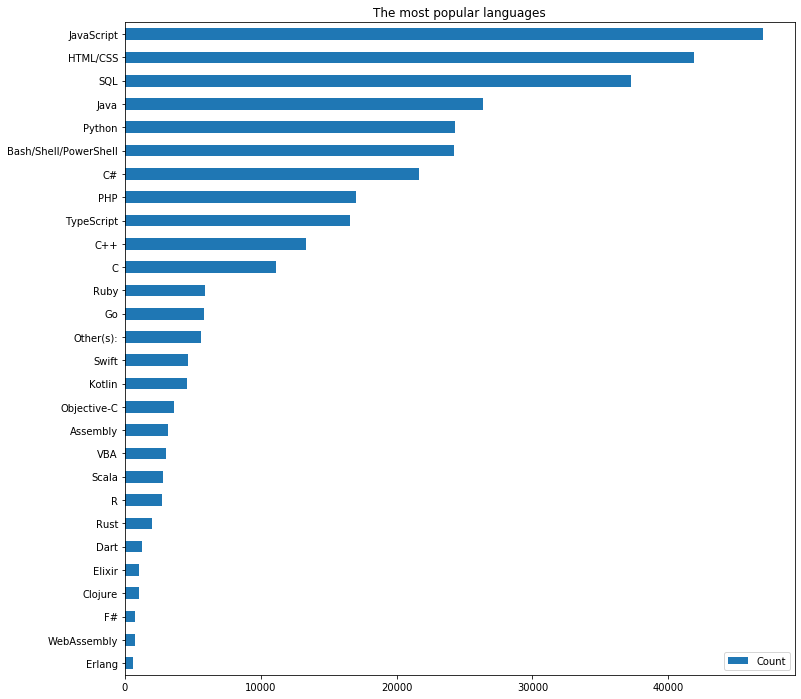

In [19]:
# plotting a bar graph
plot_dim_count(unique_languages, 'The most popular languages')

#### _Ans: The top 5 programming languages of choice for Developers seem to be JavaScript, HTML/CSS, SQL, Java, and Python._ 

#### _Q:  What are some of the most popular web frameworks used by Developers?_ 

In [20]:
# splitting `WebFrameWorkedWith` on ';' 
frameworks = developer[ developer['WebFrameWorkedWith'].notnull() ]

unique_frameworks = {}

# splitting the frameorks on ;
for framework_set in frameworks['WebFrameWorkedWith'].apply(lambda row: str(row).split(';')):
    for framework in framework_set:
        if framework not in unique_frameworks.keys():
            unique_frameworks[framework] = 1
        else:
            unique_frameworks[framework] += 1

We plot a bar graph to easily visualize and answer our question.

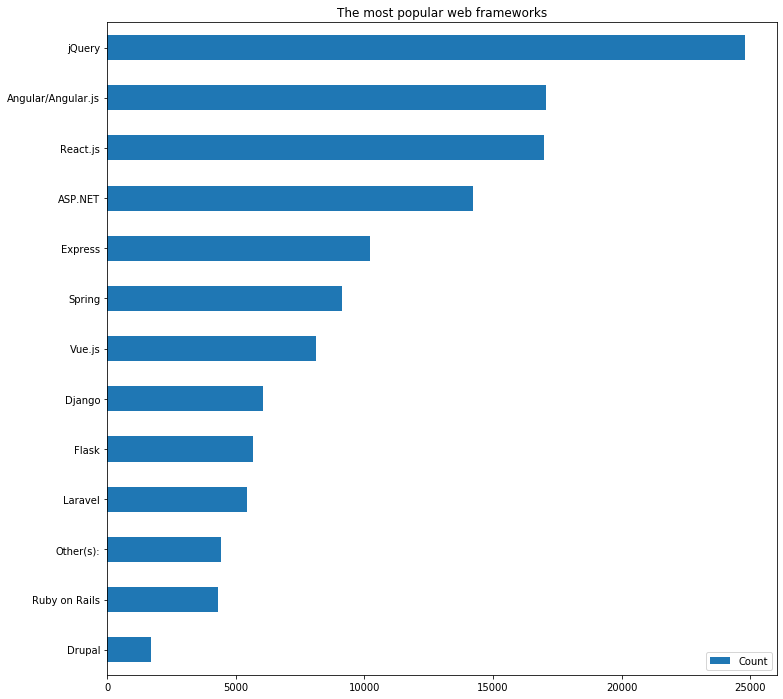

In [21]:
# plotting a bar graph
plot_dim_count(unique_frameworks, 'The most popular web frameworks')

#### _Ans: jQuery, Angular/Angular.js, and React.js seem to be the most popular web frameworks preferred by Developers._ 

#### _Q: How regularly do Developers contribute to open source projects?_

We plot a histogram to easily visualize and answer our question.

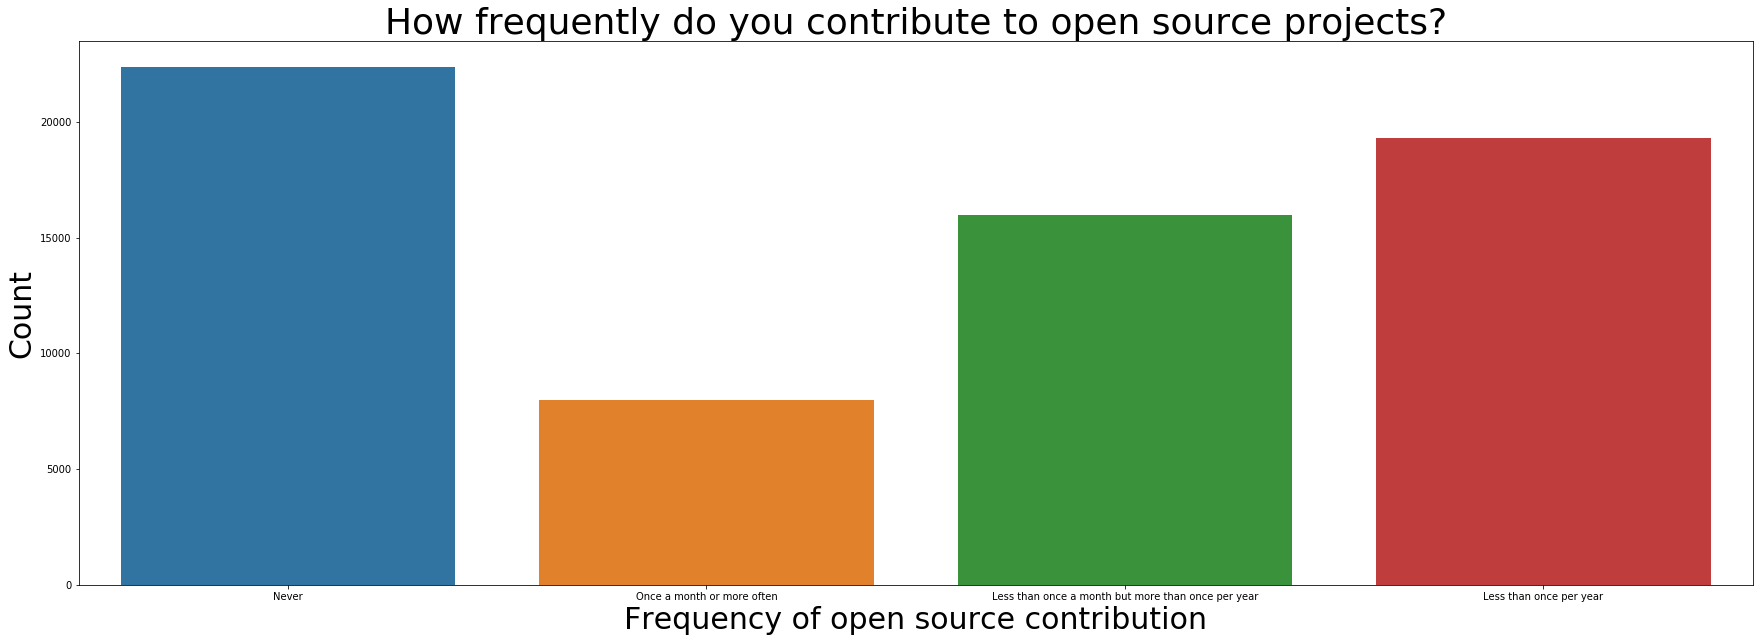

In [22]:
plt.figure(figsize = (30, 10))
sns.countplot(x = 'OpenSourcer', data = developer)
plt.xlabel('Frequency of open source contribution', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title("How frequently do you contribute to open source projects?", fontsize = 36)
plt.show()

_Blue bar: "Never"_

_Orange bar: "Once a month or more often"_

_Green bar: "Less than once a month but more than once per year"_

_Red bar: "Less than once per year"_

#### _Ans: Seemingly, most Developers do not contribute to open source frequently or at all even though most of them like to code as a hobby._

#### _Q: What is the employment status of Developers?_ 

We plot a histogram to easily visualize and answer our question.

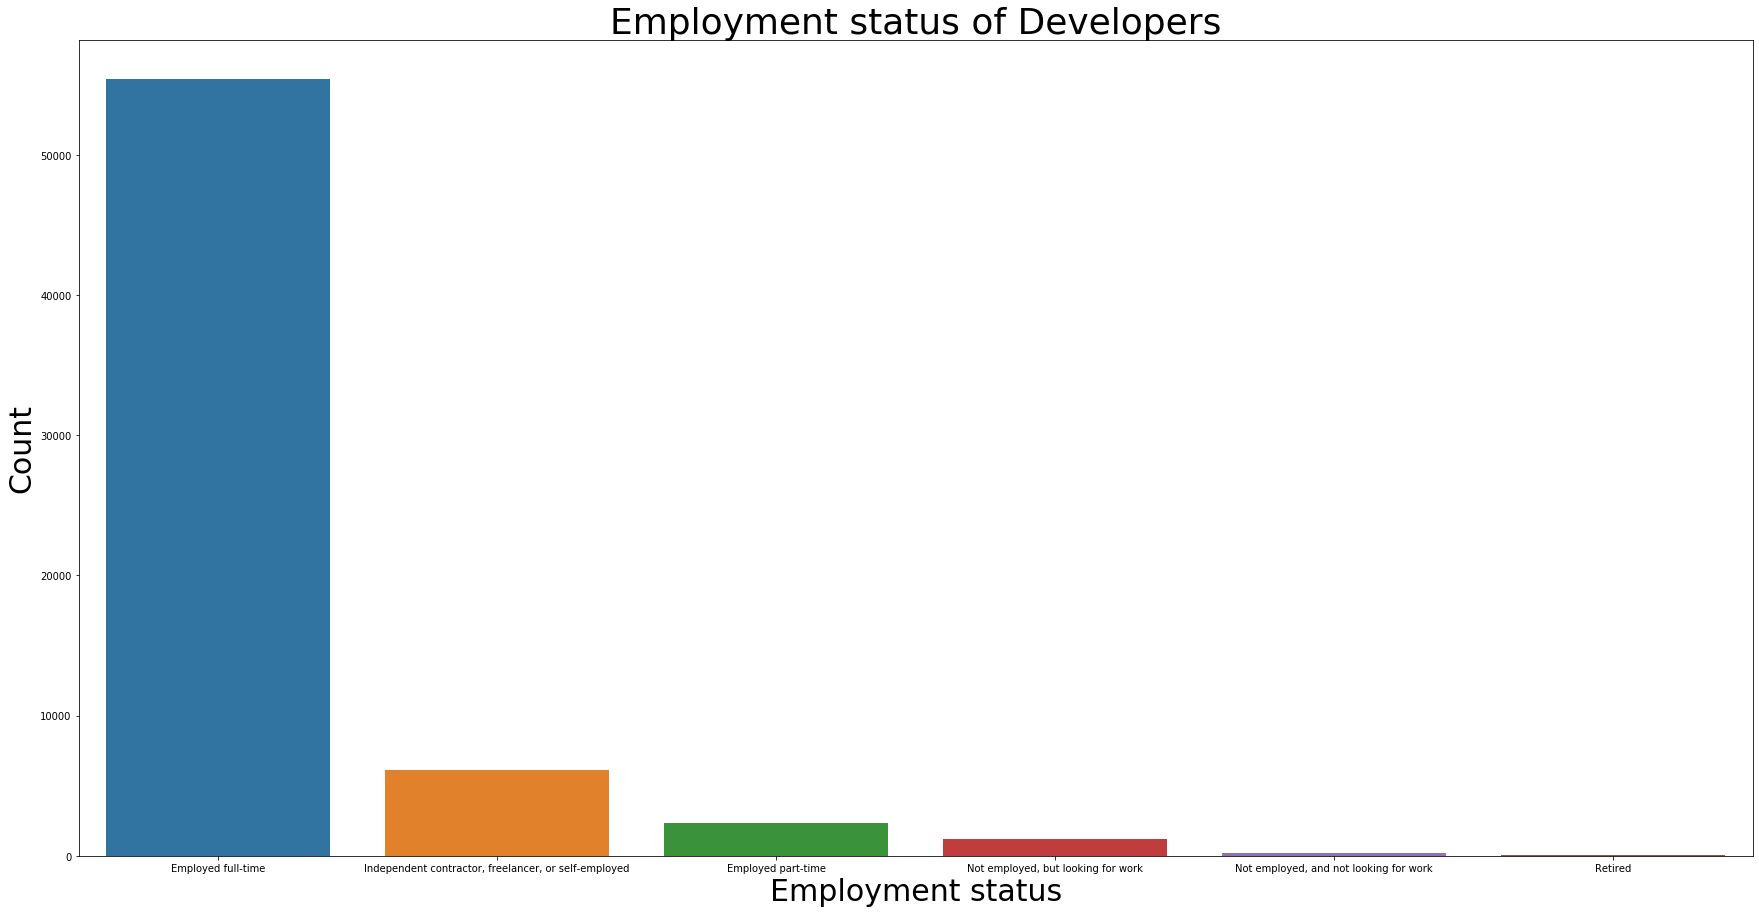

In [23]:
plt.figure(figsize = (30, 15))
sns.countplot(x ='Employment',data = developer)
plt.xlabel('Employment status', fontsize=30)
plt.ylabel('Count', fontsize = 30)
plt.title("Employment status of Developers", fontsize = 36)
plt.show()

_Blue bar: "Employed full-time"_

_Orange bar: "Independent contractor, freelancer, or self-employed"_

_Green bar: "Employed part-time"_

_Red bar: "Not employed, but looking for work"_

_Purple bar: "Not employed, and not looking for work"_

_Last entry: "Retired"_

#### _Ans: The majority of Developers are employed full time._ 

#### _Q: What is the job satisfaction rate among Developers?_ 

We plot a histogram to easily visualize and answer our question.

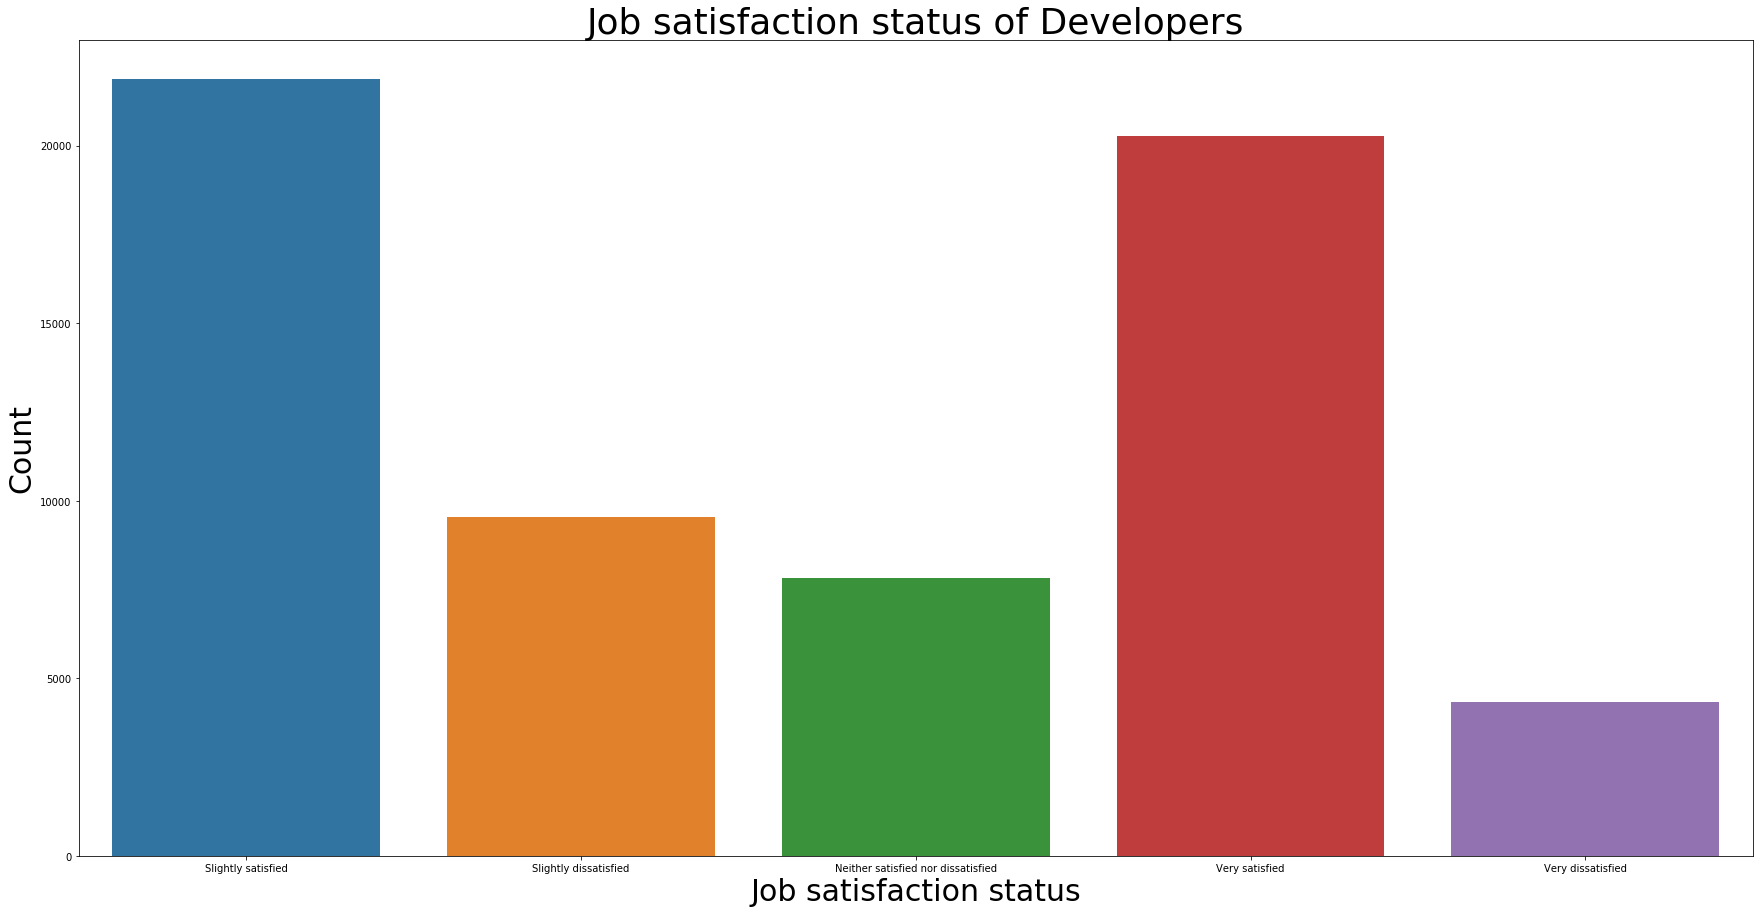

In [24]:
plt.figure(figsize = (30,15))
sns.countplot(x = 'JobSat', data = developer)
plt.xlabel('Job satisfaction status', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title("Job satisfaction status of Developers", fontsize=36)
plt.show()

_Blue bar: "Slightly satisfied"_

_Orange bar: "Slightly dissatisfied"_

_Green bar: "Neither satisfied, nor dissatisfied"_

_Red bar: "Very satisfied"_

_Purple bar: "Very dissatisfied"_


#### _Ans: Most Developers are quite satisfied with their jobs._

#### _Q: What is the distribution of the nationalities of Developers?_ 

In [25]:
# creating a copy of the dataframe
devcopy = developer.copy()

#replacing strings with numerical ratings
devcopy['JobSat'].replace({'Very dissatisfied':0,
                              'Slightly satisfied':1, 
                              'Neither satisfied nor dissatisfied':2,
                              'Slightly dissatisfied':3, 
                              'Very satisfied':4, 
                              },
                             inplace=True)


We display the top 10 countries where Developers are most satisfied with their jobs.

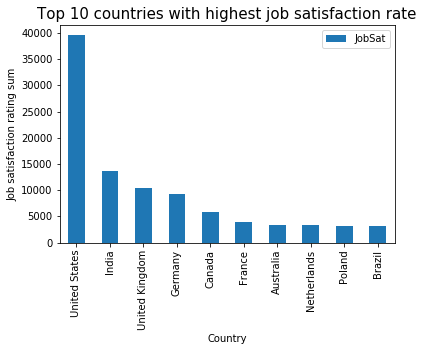

In [26]:
# grouping job satisfaction rate by country
jobsat = devcopy.groupby('Country')['JobSat'].sum().sort_values(ascending = False).head(10).reset_index()

# plotting a bar plot
jobsat.plot.bar(x = 'Country',y = 'JobSat')
plt.xlabel('Country', fontsize = 10)
plt.ylabel("Job satisfaction rating sum", fontsize = 10)
plt.title("Top 10 countries with highest job satisfaction rate", fontsize = 15)
plt.show()

#### _Ans: Most Developers are from the United States of America._ 

#### _Q: What is the pay like for Developers?_ 

We take into account the `DevType`, `Country`, and `ConvertedComp` columns. Let's see what they stand for.

In [27]:
salaries_df = developer[ ['DevType', 'Country','ConvertedComp'] ]

for column in salaries_df.columns.tolist():
    col_desc = schema[ schema['Column'] == column]['QuestionText'].iloc[0]
    print(column,":",col_desc)

DevType : Which of the following describe you? Please select all that apply.
Country : In which country do you currently reside?
ConvertedComp : Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.


Let's check for percentage of missing data.

In [28]:
round((salaries_df.isnull().sum() / salaries_df.shape[0]) * 100, 1)

DevType           1.8
Country           0.0
ConvertedComp    23.1
dtype: float64

Seems like a large number of developers did . it disclose their salaries, potentially due to NDAs and privacy concerns.

To assess pay uniformly, we will look at salary distributions by country.

In [29]:
# dropping rows with missing values from salaries_df
clean_salaries_df = salaries_df.dropna().reset_index()

In [30]:
# a count of developers by country
clean_salaries_df.Country.value_counts().reset_index()

,index,Country
0,United States,13346
1,India,3738
2,United Kingdom,3623
3,Germany,3339
4,Canada,2021
...,...,...
154,Democratic People's Republic of Korea,1
155,Djibouti,1
156,Chad,1
157,Mali,1


Looks like USA has the largest number of respondents, while lots of other countries are grossly underrepresented.

We now plot the salary distributions of the top 10 most represented countries.

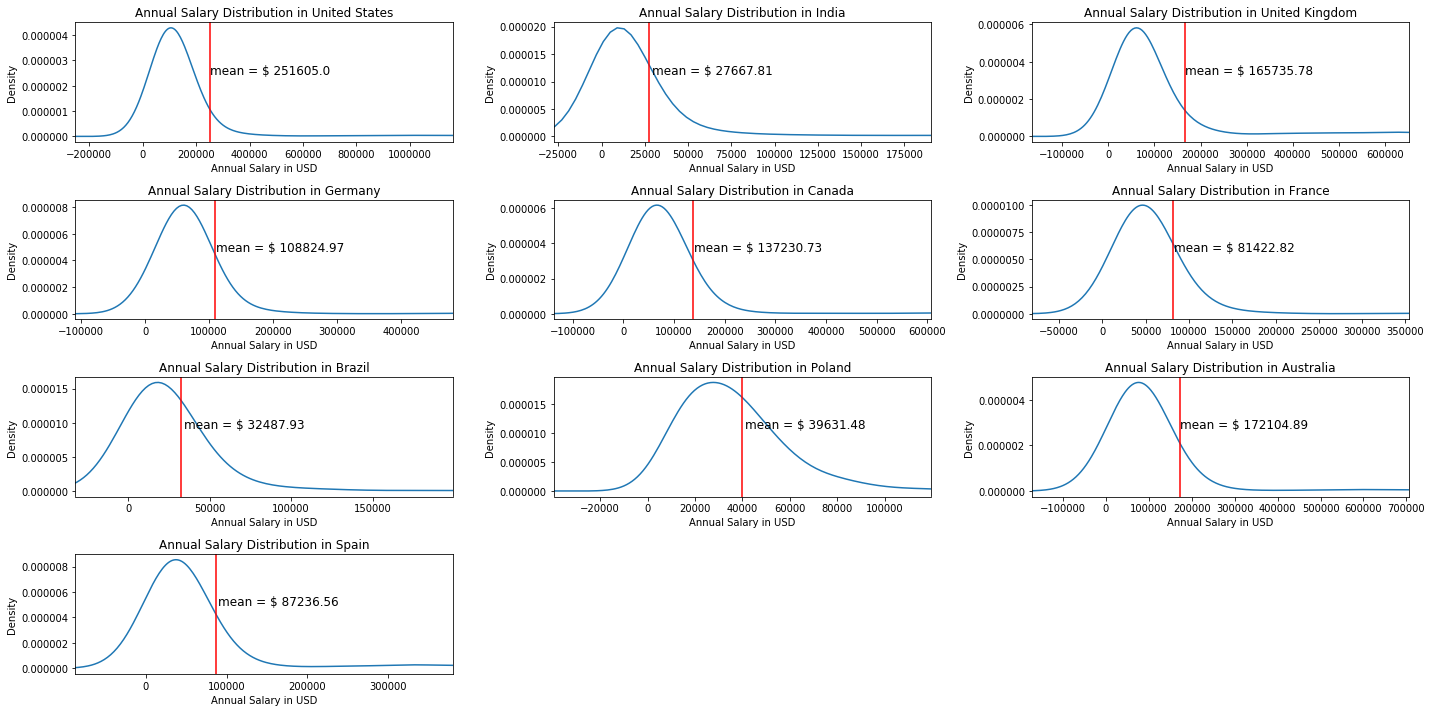

In [31]:
fig = plt.figure(figsize = (20, 10))

countries = clean_salaries_df['Country'].value_counts().sort_values(ascending = False)[:10].index.tolist()

for i, country in enumerate(countries):
    plt.subplot(4, 3, i + 1)
    temp_salaries = clean_salaries_df.loc[clean_salaries_df['Country'] == country, 'ConvertedComp']

    ax = temp_salaries.plot(kind = 'kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1]) * 0.55), 'mean = $ ' + str(round(temp_salaries.mean(),2)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(), temp_salaries.mean() + 2 * temp_salaries.std())
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.show()


_Function adapted from code written by [Modingwa](https://github.com/Modingwa/Stack-Overflow-2019-Survey-Analysis/blob/master/2019%20Stack%20Overflow%20Survey%20Analysis.ipynb)_

#### _Ans: USA has the highest salaries for Developers by far._ 

#### _Q: What opinions and practices do Developers have regarding code review?_ 

We plot a histogram to easily visualize and answer our question.

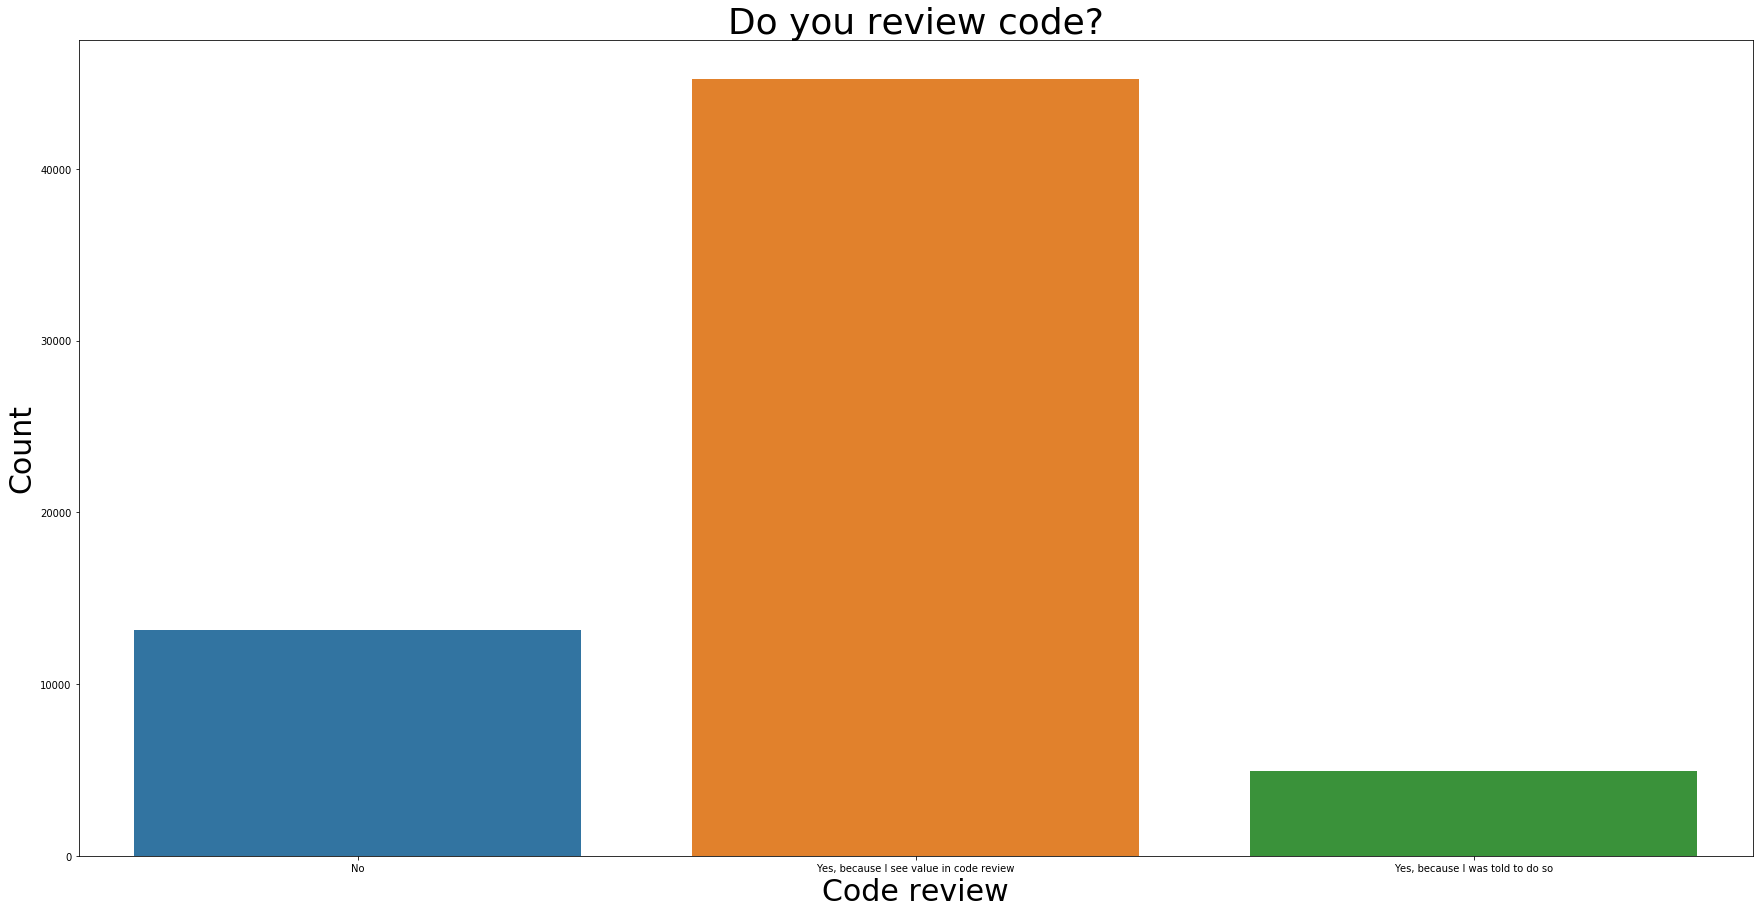

In [32]:
plt.figure(figsize = (30,15))
sns.countplot(x = 'CodeRev', data = developer)
plt.xlabel('Code review', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title("Do you review code?", fontsize=36)
plt.show()

_Blue bar: "No"_

_Orange bar: "Yes, because I see value in code review"_

_Green bar: "Yes, because I was told to do so"_

#### _Ans: Most Developers practice code review because they find value in it._ 

#### _Q: How much time do Developers spend on code review? Does it vary by the views they hold about its value?_ 

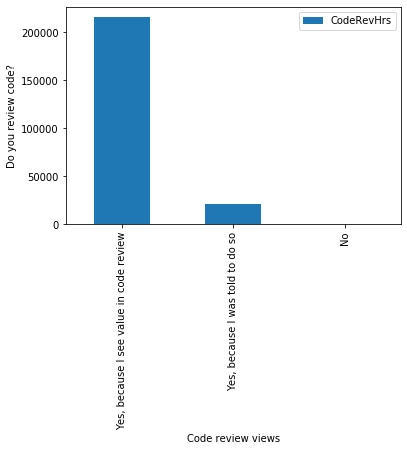

In [33]:
# grouping code review hours by the practices and opinions Developers hold about code review
coderev = developer.groupby('CodeRev')['CodeRevHrs'].sum().sort_values(ascending = False).reset_index()

# plotting a bar plot
coderev.plot.bar(x = 'CodeRev',y = 'CodeRevHrs')
plt.xlabel('Code review views', fontsize = 10)
plt.ylabel("Do you review code?", fontsize = 10)
plt.show()

 **_Ans: Clearly, since most Developers value code review, they spend a lot of time on it._** 

**_Those who do not practice code review naturally do not spend any time on it._**

**_Those who review code because they are told to do so spend relatively much less time on it._**

### Data Analysis of the differences between Data Scientists and Non-data Scientists

In the second part of this analysis, we dive deeper into the developer community to explore the differences between Data Scientists and Non-data Scientists.

Since we are interested in comparing data scientists to non-data scientists, we need to be able to differentiate between the two. This is done using the `DevType` field. As a result, we should drop any rows where this field is missing.

In [34]:
# deleting rows where `DevType` is missing
new_results = developer[ pd.notnull(developer['DevType']) ]

In [35]:
# printing size of reduced dataset
print('The reduced dataset contains', np.shape(new_results)[0], 'rows and', np.shape(new_results)[1], 'columns.')

The reduced dataset contains 64494 rows and 43 columns.


Let us now explore the unique values in the `Gender`, and `UndergradMajor` columns of the new dataframe.

In [36]:
# gender
new_results['Gender'].value_counts()

Man                                                            57579
Woman                                                           4282
Non-binary, genderqueer, or gender non-conforming                387
Man;Non-binary, genderqueer, or gender non-conforming            124
Woman;Non-binary, genderqueer, or gender non-conforming          110
Woman;Man                                                         63
Woman;Man;Non-binary, genderqueer, or gender non-conforming       32
Name: Gender, dtype: int64

The majority of respondents identify themselves as either 'Man' or 'Woman'. All other responses could be grouped together into a single "Non-binary" category for simplicity purposes only. **This is not meant to offend, belittle, or degrade any gender or anyone's identity.**

In [37]:
# age
new_results['Age'].value_counts()

25.0    3889
27.0    3766
28.0    3764
26.0    3722
24.0    3596
        ... 
43.5       1
31.4       1
37.5       1
26.3       1
33.5       1
Name: Age, Length: 99, dtype: int64

In [38]:
# undergraduate major
new_results['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          39264
Another engineering discipline (ex. civil, electrical, mechanical)        4404
Information systems, information technology, or system administration     3863
Web development or web design                                             2658
A natural science (ex. biology, chemistry, physics)                       2089
Mathematics or statistics                                                 2069
A business discipline (ex. accounting, finance, marketing)                1132
A humanities discipline (ex. literature, history, philosophy)             1130
Fine arts or performing arts (ex. graphic design, music, studio art)       918
A social science (ex. anthropology, psychology, political science)         876
I never declared a major                                                   647
A health science (ex. nursing, pharmacy, radiology)                        149
Name: UndergradMajor, dtype: int64

In [39]:
# education level
new_results['EdLevel'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              32149
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           15682
Some college/university study without earning a degree                                 7258
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3315
Associate degree                                                                       2112
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1428
Professional degree (JD, MD, etc.)                                                      874
Primary/elementary school                                                               321
I never completed any formal education                                                  292
Name: EdLevel, dtype: int64

For both `EdLevel` and `UndergradMajor`, several of the categories could be grouped together for simplicity. Additionally, category names could be shortened, to make it easier to use as labels when creating graphs.

In [40]:
# language worked with
new_results['LanguageWorkedWith'].value_counts().nlargest(10)

C#;HTML/CSS;JavaScript;SQL                                     1302
HTML/CSS;JavaScript;PHP;SQL                                    1236
C#;HTML/CSS;JavaScript;SQL;TypeScript                           950
HTML/CSS;JavaScript                                             881
HTML/CSS;JavaScript;PHP                                         730
Java                                                            659
HTML/CSS;JavaScript;TypeScript                                  649
HTML/CSS;Java;JavaScript;SQL                                    588
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL;TypeScript     485
C#                                                              446
Name: LanguageWorkedWith, dtype: int64

`LanguageWorkedWith` contains multiple selections that have been strung together into a single string. These will need to be split apart into individual entries for analysis. In some cases, categories can potentially be grouped into a smaller number of categories.

In [41]:
# job satisfaction
new_results['JobSat'].value_counts()

Slightly satisfied                    21675
Very satisfied                        20022
Slightly dissatisfied                  9469
Neither satisfied nor dissatisfied     7660
Very dissatisfied                      4278
Name: JobSat, dtype: int64

In [42]:
# career satisfaction
new_results['CareerSat'].value_counts()

Very satisfied                        26323
Slightly satisfied                    22217
Slightly dissatisfied                  6573
Neither satisfied nor dissatisfied     6092
Very dissatisfied                      3289
Name: CareerSat, dtype: int64

To allow summary statistics to be calculated for `JobSat` and `CareerSat`, we convert the satisfaction rating scale into a numeric scale where "Very dissatisfied" = 1, "Slightly dissatisfied" = 2, etc. similar to what was already done earlier for Developers.

We first split our data into 'data scientist' and 'non-data scientist' subsets.

In [43]:
# creating data scientist and non-data scientist subsets
survey_ds = new_results[ new_results['DevType'].str.contains('Data scientist') == True ]
survey_non_ds = new_results[ new_results['DevType'].str.contains('Data scientist') == False ]

In [44]:
print('There are', len(survey_ds), 'rows in the "data scientist" subset and', len(survey_non_ds), 'rows in the "non-data scientist" subset.')

There are 4317 rows in the "data scientist" subset and 60177 rows in the "non-data scientist" subset.


Let us simplify `Gender`, `EdLevel`, and `UndergradMajor` to reduce the length of category labels and to group similar categories into a single category.

In [45]:
# simplifying Gender
def simplify_gender(df):
    conditions_gender = [(df['Gender'] == 'Man'),
                         (df['Gender'] == 'Woman'),
                         (df['Gender'] != 'Man') & (df['Gender'] != 'Woman') 
                         & (pd.isnull(df['Gender']) == False)]

    choices_gender = ['Man', 'Woman', 'Non-binary']

    df['Gender_New'] = np.select(conditions_gender, choices_gender, default = np.NaN)
    
    return df
                
# applying function to subsets
survey_ds = simplify_gender(survey_ds)
survey_non_ds = simplify_gender(survey_non_ds)

In [46]:
# simplifying EdLevel
def simplify_ed(df):
    conditions_ed = [(df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                     (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                     (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                     (df['EdLevel'] == 'Associate degree'),
                     (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                     (df['EdLevel'] == 'Some college/university study without earning a degree') 
                     | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                     | (df['EdLevel'] == 'Primary/elementary school')
                     | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Bachelors', 'Masters', 'Professional', 'Associate', 'Doctorate', 'No Degree']

    df['EdLevel_New'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    
    return df

# applying function to subsets
survey_ds = simplify_ed(survey_ds)
survey_non_ds = simplify_ed(survey_non_ds)

In [47]:
# simplifying UndergradMajor
def simplify_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)')
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'),
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)')]

    choices_major = ['Computer Science', 'Engineering', 'IT/Info Systems', 'Math/Statistics', 'Other Science',
                     'Web Design/Development', 'Business', 'Arts/Humanities/Social Science']

    df['UndergradMajor_New'] = np.select(conditions_major, choices_major, default = np.NaN)
    
    return df

# applying function to subsets
survey_ds = simplify_major(survey_ds)
survey_non_ds = simplify_major(survey_non_ds)

We now convert satisfaction scales from strings to numerical values.

In [48]:
# converting satisfaction scales to numeric scales
def convert_scale(df, col, new_col):
    conditions_sat = [(df[col] == 'Very dissatisfied'),
                     (df[col] == 'Slightly dissatisfied'),
                     (df[col] == 'Neither satisfied nor dissatisfied'),
                     (df[col] == 'Slightly satisfied'),
                     (df[col] == 'Very satisfied')]
    
    choices_sat = [1, 2, 3, 4, 5]
    
    df[new_col] = np.select(conditions_sat, choices_sat, default = np.NaN)
    
    return df

# Apply function to subsets
survey_ds = convert_scale(survey_ds, 'JobSat', 'JobSat_Num')
survey_ds = convert_scale(survey_ds, 'CareerSat', 'CareerSat_Num')

survey_non_ds = convert_scale(survey_non_ds, 'JobSat', 'JobSat_Num')
survey_non_ds = convert_scale(survey_non_ds, 'CareerSat', 'CareerSat_Num')

For the fields where multiple selections were possible (i.e. LanguageWorkedWith), we split the strings containing the multiple selections into a list of selections and then concatenate these lists into a single list (dropping any missing values in the process), similar to what we did above for Developers.

In [49]:
# creating dataframe containing split string values by respondent number
def split_list(df, col):
    in_res = list(df['Respondent'])
    in_list = list(df[col])
    
    out_res = []
    out_list = []
    
    for i in range(len(in_list)):
        if pd.isnull(in_list[i]) == False:
            vals = in_list[i].split(';')
            res = [in_res[i]] * len(vals)
            
            out_list.append(vals)
            out_res.append(res)
    
    out_df = pd.DataFrame({'Respondent': list(np.concatenate(out_res)), col: list(np.concatenate(out_list))})
    
    return out_df

In [50]:
# splitting LanguageWorkedWith
languages_ds = split_list(survey_ds, 'LanguageWorkedWith')
languages_non_ds = split_list(survey_non_ds, 'LanguageWorkedWith')

We will be excluding the missing values from any calculations.

Now that we have processed our data, our next step is to apply statistical analysis techniques to this processed data in order to answer our research questions. But before that, we first define several functions for performing this analysis.

In [51]:
# comparing the distribution of the two subsets for a specified column

# getting the proportion of the dataset by category
def get_proportions(df, col, index_order = None, drop = True, multi = False):
    
    # summarizing by column value
    summary = df[ ['Respondent', col] ].groupby([col]).count()
    
    # dropping NaN values
    if drop:
        summary = summary.drop('nan')

    # converting sums to proportions
    if multi:
        props = summary / df['Respondent'].nunique()
    
    else:
        props = summary / summary['Respondent'].sum()
        
    
    # sorting rows in order specified
    if index_order != None:
        props = props.reindex(index_order)
        
    # converting index into column
    props.reset_index(level = 0, inplace = True)
    
    return props

Code reference: https://stackoverflow.com/questions/20461165/how-to-convert-pandas-index-in-a-dataframe-to-a-column

In [52]:
# create summary dataset for comparing the two subsets
def create_summary(df_ds, df_non_ds, col, index_order = None, drop = True, multi = False):

    # getting proportions for each subset
    props_ds = get_proportions(df_ds, col, index_order, drop, multi)
    props_non_ds = get_proportions(df_non_ds, col, index_order, drop, multi)
    
    # renaming respondent column
    props_ds = props_ds.rename(columns = {'Respondent':'Data Scientist'})
    props_non_ds = props_non_ds.rename(columns = {'Respondent':'Non-data Scientist'})
    
    # merging dataframes
    props_all = pd.merge(props_non_ds, props_ds, how = 'outer', on = col)
    
    # replacing any missing values with zeros
    props_all = props_all.fillna(0)

    return props_all

In [53]:
# creating comparison plot
def create_bar_plot(df, col, x_lab, title, rot = 0):

    # changing dataframe to long form
    long = pd.melt(df, id_vars = col, var_name ='DevType', value_name ='Proportion')
    
    # creating plot
    sns.catplot(x = col, y ='Proportion', hue = 'DevType', data = long, kind = 'bar', legend = False);
    
    # setting plot labels
    plt.xlabel(x_lab)
    plt.title(title)
    plt.gca().legend().set_title('')
    plt.xticks(rotation = rot)

### Comparing differences between Data Scientists and Non-data Scientists

#### _Q: What is the gender distribution between Data Scientists and Non-data Scientists?_ 

In [54]:
# creating summary dataframe
gender_props = create_summary(survey_ds, survey_non_ds, 'Gender_New')

print(gender_props)

   Gender_New  Non-data Scientist  Data Scientist
0         Man            0.920093        0.920650
1  Non-binary            0.011200        0.014818
2       Woman            0.068707        0.064532


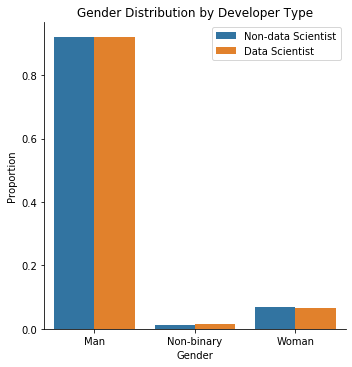

In [55]:
# creating comparison plot
create_bar_plot(gender_props, 'Gender_New', 'Gender', 'Gender Distribution by Developer Type')

Let us look a little more closely at the gender ditribution among younger developers.

In [56]:
# comparing gender distribution for younger age groups (i.e. under 35 years old) only
gender_props_u35 = create_summary(survey_ds[survey_ds['Age'] < 35], survey_non_ds[survey_non_ds['Age'] < 35],
                                  'Gender_New')

print(gender_props_u35)

   Gender_New  Non-data Scientist  Data Scientist
0         Man             0.91450        0.917981
1  Non-binary             0.01145        0.011917
2       Woman             0.07405        0.070102


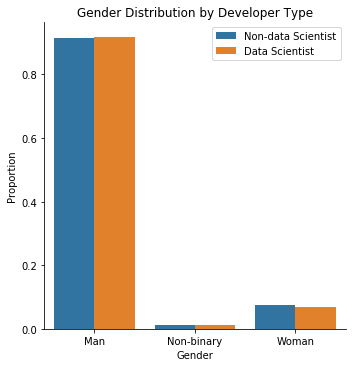

In [57]:
# creating comparison plot
create_bar_plot(gender_props_u35, 'Gender_New', 'Gender', 'Gender Distribution by Developer Type')

#### _Ans: There is very little difference between the gender distributions of data scientists and non-data scientists. Even if we exclude the older respondents, we observe little difference in the distribution._ 

#### _Q: What is the age distribution between Data Scientists and Non-data Scientists?_ 

Our null hypothesis is: **The age distributions of the data scientists and non-data scientists are the same at the 5% significance level**.

In [58]:
# calculating summary statistics
print('The mean age of Data Scientists is:', round(survey_ds['Age'].mean(), 2), "years with a standard deviation of", round(survey_ds['Age'].std(), 2), "years.")
print('The mean age of Non-data Scientists is:', round(survey_non_ds['Age'].mean(), 2), "years with a standard deviation of", round(survey_non_ds['Age'].std(), 2), "years.")

The mean age of Data Scientists is: 30.89 years with a standard deviation of 8.18 years.
The mean age of Non-data Scientists is: 31.19 years with a standard deviation of 8.15 years.


We first use the **Shapiro-Wilk normality test** to see whether our null hypothesis holds at the 5% significance level. Thus $\alpha = 0.05$

_The Shapiro–Wilk test tests the null hypothesis that a sample $x_1, ..., x_n$ came from a normally distributed population. If the p-value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested is not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis that the data came from a normally distributed population can not be rejected (e.g., for an alpha level of .05, a data set with a p-value of less than .05 rejects the null hypothesis that the data is from a normally distributed population)._

Source: [Wikipedia](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

In [59]:
# checking for normality of distributions
print('The p-value for the Shapiro-Wilk normality test for the Data Scientists subset is:',
      scipy.stats.shapiro(survey_ds['Age'].dropna())[1])
print('The p-value for the Shapiro-Wilk normality test for the Non-data Scientists subset is:',
      scipy.stats.shapiro(survey_non_ds['Age'].dropna())[1])

The p-value for the Shapiro-Wilk normality test for the Data Scientists subset is: 8.407790785948902e-45
The p-value for the Shapiro-Wilk normality test for the Non-data Scientists subset is: 0.0


For both subsets, we reject the null hypothesis that `Age` is normally distributed at the 5% significance level. Therefore, we need to use the **Mann-Whitney U-test** to compare the two samples.

_The Mann–Whitney U test is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population. This test can be used to investigate whether two independent samples were selected from populations having the same distribution._

Source: [Wikipedia](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

In [60]:
# comparing distributions
print('The p-value for the Mann-Whitney U test comparing the two distributions is:', 
      scipy.stats.mannwhitneyu(survey_ds['Age'].dropna(), survey_non_ds['Age'].dropna())[1])

The p-value for the Mann-Whitney U test comparing the two distributions is: 0.001041589315016971


#### _Ans: We see that the p-value for the Mann-Whitney U test is < 0.05. Therefore, we do have to reject the null hypothesis that the age distributions of the data scientists and non-data scientists are the same at the 5% significance level._

#### _Q: What is the education level distribution between Data Scientists and Non-data Scientists?_ 

In [61]:
# creating summary dataframe
ed_props = create_summary(survey_ds, survey_non_ds, 'EdLevel_New', index_order = ['No Degree', 'Associate', 'Bachelors', 'Masters', 'Doctorate', 'Professional'])

print(ed_props)

    EdLevel_New  Non-data Scientist  Data Scientist
0     No Degree            0.181589        0.103747
1     Associate            0.034600        0.015222
2     Bachelors            0.516134        0.377986
3       Masters            0.237504        0.381967
4     Doctorate            0.016193        0.110070
5  Professional            0.013979        0.011007


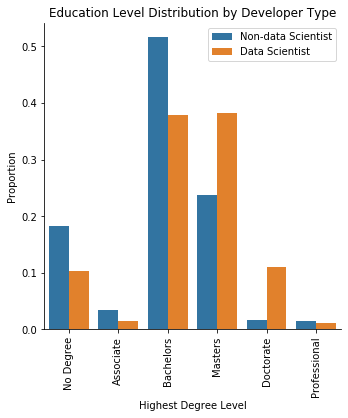

In [62]:
# creating comparison plot
create_bar_plot(ed_props, 'EdLevel_New', 'Highest Degree Level', 'Education Level Distribution by Developer Type', rot = 90)

#### _Ans: Data scientists are more likely to have an advanced degree (i.e. Masters or Doctorate) than non-data scientists, who in many cases don't even have a degree at all._

#### _Q: What is the distribution of undergraduate majors between Data Scientists and Non-data Scientists?_ 

In [63]:
# creating summary dataframe
major_props = create_summary(survey_ds, survey_non_ds, 'UndergradMajor_New')

print(major_props)

               UndergradMajor_New  Non-data Scientist  Data Scientist
0  Arts/Humanities/Social Science            0.050697        0.039683
1                        Business            0.019424        0.018105
2                Computer Science            0.675770        0.600446
3                     Engineering            0.074560        0.084077
4                 IT/Info Systems            0.068507        0.031746
5                 Math/Statistics            0.029420        0.115327
6                   Other Science            0.033492        0.102183
7          Web Design/Development            0.048129        0.008433


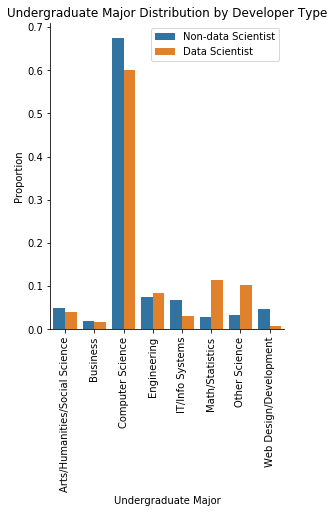

In [64]:
# creating comparison plot
create_bar_plot(major_props, 'UndergradMajor_New', 'Undergraduate Major', 'Undergraduate Major Distribution by Developer Type', rot = 90)

#### _Ans: Although both data scientists and non-data scientists are most likely to have majored in computer science as undergraduates, a much larger proportion of data scientists came from a math/stats or other science background than non-data scientists._

#### _Q: What programming languages do data scientists favor and how do they differ from those used by non-data scientists?_

In [65]:
# Create summary dataframe
language_props = create_summary(languages_ds, languages_non_ds, 'LanguageWorkedWith', drop = False, multi = True)

# Create difference plot
language_props['Diff'] = language_props['Data Scientist'] - language_props['Non-data Scientist']
language_props.style.bar(subset = ['Diff'], align = 'mid', color = ['#d65f5f', '#5fba7d'])

,LanguageWorkedWith,Non-data Scientist,Data Scientist,Diff
0,Assembly,0.0447228,0.0799534,0.0352306
1,Bash/Shell/PowerShell,0.363293,0.478322,0.115028
2,C,0.162241,0.24662,0.0843789
3,C#,0.337609,0.259207,-0.0784011
4,C++,0.192652,0.32634,0.133688
5,Clojure,0.0148798,0.0254079,0.0105282
6,Dart,0.018821,0.0198135,0.000992545
7,Elixir,0.0160989,0.0179487,0.00184985
8,Erlang,0.00883434,0.0165501,0.00771578
9,F#,0.0111723,0.0158508,0.00467847


**Green** indicates that the respective language is favored more by **data scientists** and **red** indicates that the language is favored more by **non-data scientists**.

In [66]:
# getting top 10 languages used by data scientists
ctr_ds = Counter(languages_ds['LanguageWorkedWith']).most_common(10)
print("The top 10 languages used by data scientists:")
print()
for i in range(len(ctr_ds)):
    print(i+1,ctr_ds[i][0])
    print()
    
top10_ds = list(list(zip(*ctr_ds))[0])

The top 10 languages used by data scientists:

1 Python

2 SQL

3 JavaScript

4 HTML/CSS

5 Bash/Shell/PowerShell

6 Java

7 C++

8 R

9 C#

10 C



In [67]:
# getting top 10 languages used by non-data scientists
ctr_nonds = Counter(languages_non_ds['LanguageWorkedWith']).most_common(10)
print("The top 10 languages used by non-data scientists:")
print()
for i in range(len(ctr_nonds)):
    print(i+1,ctr_nonds[i][0])
    print()
    
top10_non_ds = list(list(zip(*ctr_nonds))[0])

The top 10 languages used by non-data scientists:

1 JavaScript

2 HTML/CSS

3 SQL

4 Java

5 Bash/Shell/PowerShell

6 Python

7 C#

8 PHP

9 TypeScript

10 C++



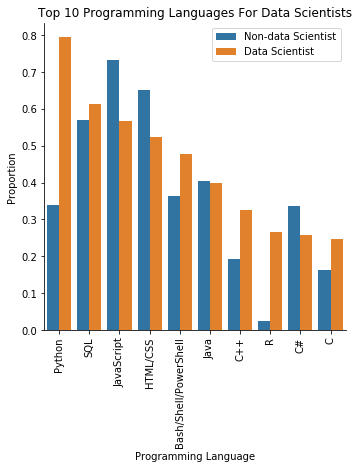

In [68]:
# creating top 10 languages comparison plot for data scientists
top10_props_ds = language_props[ language_props['LanguageWorkedWith'].isin(top10_ds) ].sort_values('Data Scientist', ascending = False)
top10_props_ds.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_props_ds, 'LanguageWorkedWith', 'Programming Language', 'Top 10 Programming Languages For Data Scientists', rot = 90)

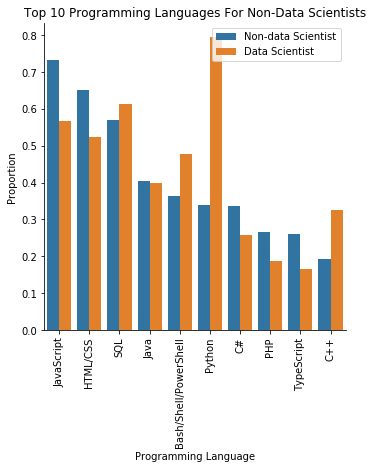

In [69]:
# creating top 10 languages comparison plot for non-data scientists
top10_props_non_ds = language_props[language_props['LanguageWorkedWith'].isin(top10_non_ds)].sort_values('Non-data Scientist', ascending = False)
top10_props_non_ds.drop('Diff', axis = 1, inplace = True)

create_bar_plot(top10_props_non_ds, 'LanguageWorkedWith', 'Programming Language', 'Top 10 Programming Languages For Non-Data Scientists', rot = 90)

#### _Ans: There are lots of overlaps between the top 10 programming languages used by data scientists and non-data scientists. However, comparing the proportion of each subset that program in each language, data scientists are much more likely to program in Python, or R than non-data scientists (i.e. languages that are typically used for performing data science related activities, such as fitting statistical models), while non-data scientists are more likely to program in HTML, CSS and Javascript (i.e. languages often used for web design activities). Just because a data scientist and a non-data scientist use the same programming language, doesn't necessarily mean that they are using it for the same purpose. This is particularly the case with languages such as Python which comprise many packages for different purposes._

#### _Q: How much coding experience do data scientists have compared to non-data scientists?_

Our null hypothesis is: **The years of coding experience of the data scientists and non-data scientists are the same at the 5% significance level**.

In [70]:
# converting data to int type
def convert_to_int (df):
    df['YearsCode'] = df['YearsCode'].astype(str)
    df['YearsCode'] = df['YearsCode'].replace("Less than 1 year", "0")
    df['YearsCode'] = df['YearsCode'].replace("More than 50 years", "51")
    df['YearsCode'] = df['YearsCode'].replace("nan", "0")
    df['YearsCode'] = df['YearsCode'].astype(int)
    
    df['YearsCodePro'] = df['YearsCodePro'].astype(str)
    df['YearsCodePro'] = df['YearsCodePro'].replace("Less than 1 year", "0")
    df['YearsCodePro'] = df['YearsCodePro'].replace("More than 50 years", "51")
    df['YearsCodePro'] = df['YearsCodePro'].replace("nan", "0")
    df['YearsCodePro'] = df['YearsCodePro'].astype(int)

    return df

In [71]:
survey_ds = convert_to_int(survey_ds)
survey_non_ds = convert_to_int(survey_non_ds)

For general number of years of coding experience.

In [72]:
# calculating summary statistics

print('The mean number of years coding for Data Scientists is:', round(survey_ds['YearsCode'].mean(), 2), "years with a standard deviation of", round(survey_ds['YearsCode'].std(), 2), "years.")
print('The mean number of years coding for Non-data Scientists is:', round(survey_non_ds['YearsCode'].mean(), 2), "years with a standard deviation of", round(survey_non_ds['YearsCode'].std(), 2), "years.")


The mean number of years coding for Data Scientists is: 13.02 years with a standard deviation of 9.23 years.
The mean number of years coding for Non-data Scientists is: 12.61 years with a standard deviation of 8.75 years.


In [73]:
# checking for normality of distributions
print('The p-value for the Shapiro-Wilk normality test for the data scientists subset is:',
      scipy.stats.shapiro(survey_ds['YearsCode'].dropna())[1])
print('The p-value for the Shapiro-Wilk normality test for the non-data scientists subset is:',
      scipy.stats.shapiro(survey_non_ds['YearsCode'].dropna())[1])

The p-value for the Shapiro-Wilk normality test for the data scientists subset is: 0.0
The p-value for the Shapiro-Wilk normality test for the non-data scientists subset is: 0.0


For both subsets, we reject the null hypothesis that `YearsCode` is normally distributed at the 5% significance level. Therefore, we need to use the Mann-Whitney U-test to compare the two samples.

In [74]:
# comparing distributions
print('The p-value for the Mann-Whitney U test comparing the two distributions is:',
      scipy.stats.mannwhitneyu(survey_ds['YearsCode'].dropna(), survey_non_ds['YearsCode'].dropna())[1])

The p-value for the Mann-Whitney U test comparing the two distributions is: 0.06236141509769714


The p-value for the Mann-Whitney U test is > 0.05. Therefore, we do not reject the null hypothesis that the distributions of years coding is the same for the data scientists and non-data scientists, at the 5% significance level.

For number of years of professional coding experience.

In [75]:
# calculating summary statistics

print('The mean number of years coding professionally for Data Scientists is:', round(survey_ds['YearsCodePro'].mean(), 2), "years with a standard deviation of", round(survey_ds['YearsCodePro'].std(), 2), "years.")
print('The mean number of years coding professionally for Non-data Scientists is:', round(survey_non_ds['YearsCodePro'].mean(), 2), "years with a standard deviation of", round(survey_non_ds['YearsCodePro'].std(), 2), "years.")


The mean number of years coding professionally for Data Scientists is: 7.9 years with a standard deviation of 7.68 years.
The mean number of years coding professionally for Non-data Scientists is: 8.02 years with a standard deviation of 7.35 years.


In [76]:
# checking for normality of distributions
print('The p-value for the Shapiro-Wilk normality test for the data scientists subset is:',
      scipy.stats.shapiro(survey_ds['YearsCodePro'].dropna())[1])
print('The p-value for the Shapiro-Wilk normality test for the non-data scientists subset is:',
      scipy.stats.shapiro(survey_non_ds['YearsCodePro'].dropna())[1])

The p-value for the Shapiro-Wilk normality test for the data scientists subset is: 0.0
The p-value for the Shapiro-Wilk normality test for the non-data scientists subset is: 0.0


For both subsets, we reject the null hypothesis that `YearsCodePro` is normally distributed at the 5% significance level. Therefore, we need to use the Mann-Whitney U-test to compare the two samples.

In [77]:
# comparing distributions
print('The p-value for the Mann-Whitney U test comparing the two distributions is:',
      scipy.stats.mannwhitneyu(survey_ds['YearsCodePro'].dropna(), survey_non_ds['YearsCodePro'].dropna())[1])

The p-value for the Mann-Whitney U test comparing the two distributions is: 0.0006911307406002109


The p-value for the Mann-Whitney U test is < 0.05. Therefore, we reject the null hypothesis that the distributions of years coding professionally is the same for the data scientists and non-data scientists, at the 5% significance level.

#### _Ans: The Years of coding expeirnece in general  seem to be the same between Data Scientists and Non-data Scientists but it is not the case when it comes to years of professional coding experience. According to the mean, Non-data scientists seem to have slightly more experience. However, we cannot say for sure whether it is definitely higher or lower._

#### _Q: Are Data Scientists more satisfied with their jobs/careers than Non-data Scientists?_

In [78]:
# creating summary dataframe
job_sat_props = create_summary(survey_ds, survey_non_ds, 'JobSat',  index_order = ['Very dissatisfied',
                'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 
                'Slightly satisfied', 'Very satisfied'], drop = False)

print(job_sat_props)

                               JobSat  Non-data Scientist  Data Scientist
0                   Very dissatisfied            0.067699        0.069122
1               Slightly dissatisfied            0.151893        0.124133
2  Neither satisfied nor dissatisfied            0.121362        0.121741
3                  Slightly satisfied            0.344365        0.331021
4                      Very satisfied            0.314682        0.353982


Our null hypothesis is: **Data scientists and non-data scientists are equally satisfied with their jobs/careers**.

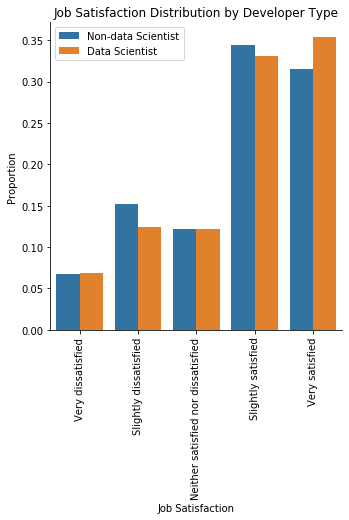

In [79]:
# creating comparison plot
create_bar_plot(job_sat_props, 'JobSat', 'Job Satisfaction', 
                'Job Satisfaction Distribution by Developer Type', rot = 90)

In [80]:
# calculating summary statistics
print('The mean job satisfaction score of data scientists is:', round(survey_ds['JobSat_Num'].mean(), 2), "with a standard deviation of", round(survey_ds['JobSat_Num'].std(), 2))
print('The mean job satisfaction score of non-data scientists is:', round(survey_non_ds['JobSat_Num'].mean(), 2), "with a standard deviation of", round(survey_non_ds['JobSat_Num'].std(), 2))

The mean job satisfaction score of data scientists is: 3.78 with a standard deviation of 1.24
The mean job satisfaction score of non-data scientists is: 3.69 with a standard deviation of 1.25


In [81]:
# checking for normality of distributions
print('The p-value for the Shapiro-Wilk normality test for the data scientists subset is:',
      scipy.stats.shapiro(survey_ds['JobSat_Num'].dropna())[1])
print('The p-value for the Shapiro-Wilk normality test for the non-data scientists subset is:',
      scipy.stats.shapiro(survey_non_ds['JobSat_Num'].dropna())[1])

The p-value for the Shapiro-Wilk normality test for the data scientists subset is: 0.0
The p-value for the Shapiro-Wilk normality test for the non-data scientists subset is: 0.0


For both subsets, we reject the null hypothesis that `JobSat_Num` is normally distributed at the 5% significance level. Therefore, we need to use the Mann-Whitney U-test to compare the two samples.

In [82]:
# comparing distributions
print('The p-value for the Mann-Whitney U test comparing the two distributions is:',
      scipy.stats.mannwhitneyu(survey_ds['JobSat_Num'].dropna(), survey_non_ds['JobSat_Num'].dropna())[1])

The p-value for the Mann-Whitney U test comparing the two distributions is: 2.1255331039641703e-07


The p-value for the Mann-Whitney U test is < 0.05. Therefore, we reject the null hypothesis that the data scientists and non-data scientists are equally satisfied with their jobs, at the 5% significance level.

In [83]:
# creating summary dataframe
career_sat_props = create_summary(survey_ds, survey_non_ds, 'CareerSat',  index_order = ['Very dissatisfied',
                'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 
                'Slightly satisfied', 'Very satisfied'], drop = False)

print(career_sat_props)

                            CareerSat  Non-data Scientist  Data Scientist
0                   Very dissatisfied            0.050767        0.054204
1               Slightly dissatisfied            0.102863        0.088719
2  Neither satisfied nor dissatisfied            0.094870        0.088719
3                  Slightly satisfied            0.345614        0.328700
4                      Very satisfied            0.405886        0.439657


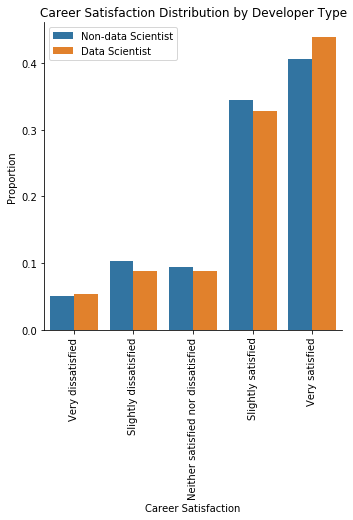

In [84]:
# creating comparison plot
create_bar_plot(career_sat_props, 'CareerSat', 'Career Satisfaction', 
                'Career Satisfaction Distribution by Developer Type', rot = 90)

In [85]:
# calculating summary statistics
print('The mean career satisfaction score of data scientists is:', round(survey_ds['CareerSat_Num'].mean(), 2), "with a standard deviation of", round(survey_ds['CareerSat_Num'].std(), 2))
print('The mean career satisfaction score of non-data scientists is:', round(survey_non_ds['CareerSat_Num'].mean(), 2), "with a standard deviation of", round(survey_non_ds['CareerSat_Num'].std(), 2))

The mean career satisfaction score of data scientists is: 4.01 with a standard deviation of 1.17
The mean career satisfaction score of non-data scientists is: 3.95 with a standard deviation of 1.17


In [86]:
# checking for normality of distributions
print('The p-value for the Shapiro-Wilk normality test for the data scientists subset is:',
      scipy.stats.shapiro(survey_ds['CareerSat_Num'].dropna())[1])
print('The p-value for the Shapiro-Wilk normality test for the non-data scientists subset is:',
      scipy.stats.shapiro(survey_non_ds['CareerSat_Num'].dropna())[1])

The p-value for the Shapiro-Wilk normality test for the data scientists subset is: 0.0
The p-value for the Shapiro-Wilk normality test for the non-data scientists subset is: 0.0


For both subsets, we reject the null hypothesis that `CareerSat_Num` is normally distributed at the 5% significance level. Therefore, we need to use the Mann-Whitney U-test to compare the two samples.

In [87]:
# comparing distributions
print('The p-value for the Mann-Whitney U test comparing the two distributions is:',
      scipy.stats.mannwhitneyu(survey_ds['CareerSat_Num'].dropna(), 
                               survey_non_ds['CareerSat_Num'].dropna())[1])

The p-value for the Mann-Whitney U test comparing the two distributions is: 3.0402436333955144e-05


The p-value for the Mann-Whitney U test is < 0.05. Therefore, we reject the null hypothesis that the data scientists and non-data scientists are equally satisfied with their careers, at the 5% significance level.

#### _Ans: Data scientists are more satisfied with their jobs/careers._

### Can we predict the salary of Data Scientists?

Lastly, we attempt to determine whether the annual salary of a data scientist an be determined by a group of factors that we think might be good predictors.

#### _Q: Is a linear regression model a suitable model to predict the salary of Data Scientists?_

We are going to test whether the salary of Data Scientists depend on a multitude of factors we choose based on intuition and domain knowledge. Our initial assumption is that the following are the main predictors of salary:
* `Country`: Country
* `EdLevel`: Highest level of education
* `DevType`: Developer type
* `Gender`: Gender
* `Ethnicity`: Ethnicity
* `UndergradMajor`: Major as an undergraduate
* `YearsCode`: Years of coding experience
* `YearsCodePro`: years of professional coding experience
* `WorkWeekHrs`: Hours/week of work
* `Age`: Age

We are trying estimate the linear relationship of the above factors with:
* `ConvertedComp`: Annual salary for 12 work months and 50 work weeks converted to USD

In [88]:
# removing missing values from the ConvertedComp column since it is our target variable
survey_ds = survey_ds.dropna(subset = ['ConvertedComp'], axis = 0)


In [89]:
# focusing on a subset of our variables to build our model

predictors = ['Country', 
              'EdLevel', 
              'DevType',
              'Gender', 
              'Ethnicity', 
              'UndergradMajor', 
              'YearsCode', 
              'YearsCodePro', 
              'WorkWeekHrs', 
              'Age',
              'JobSat',
              'CareerSat',
              'ConvertedComp']

survey_ds_subset = survey_ds.loc[:,predictors]

In [90]:
# encoding columns
for c in ['Country', 'EdLevel', 'DevType', 'Gender', 'Ethnicity', 'UndergradMajor', 'JobSat', 'CareerSat']:
    survey_ds_subset = pd.concat([survey_ds_subset, survey_ds_subset[c].str.get_dummies(sep = ';')], axis = 1)
    survey_ds_subset.drop(c, inplace = True, axis = 1)

In [91]:
# imputing missing values for the ConvertedComp column

survey_ds_subset['ConvertedComp'] = survey_ds_subset['ConvertedComp'].fillna(survey_ds_subset['ConvertedComp'].median())

# creating dummy variables, dropping one level since they will be used in linear regression
survey_ds_dummies = pd.get_dummies(survey_ds_subset, drop_first = True)

In [92]:
# separating our predictor from our target variable
X = survey_ds_dummies.drop(labels = 'ConvertedComp', axis = 1)
Y = survey_ds_dummies['ConvertedComp']

# building our model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Linear Regression
model_train = sm.OLS(Y_train, X_train, missing='drop')
results1 = model_train.fit()

model_test = sm.OLS(Y_test, X_test, missing='drop')
results2 = model_test.fit()

lm_y_test_preds = results2.predict(X_test)
lm_y_train_preds = results1.predict(X_train)


print("The R2 score on the train set is {} and {} on the test set with linear regression.".format(round(results1.rsquared, 2), round(results2.rsquared, 2)))


The R2 score on the train set is 0.16 and 0.26 on the test set with linear regression.


#### _Ans: With such low $r^2$ values, we cannot confidently say that a linear regression model is a good fit to predict the salary of Data Scientists._

This is a question we leave for further exploration in future projects.

### Potential Problems with dataset

* The results submitted to the survey may not be representative. Approximately 400 responses were submitted where respondents spent less than three minutes on the survey. The median time spent on the survey for qualified responses was 23.3 minutes. 
* Not all those who use Stack Overflow are represented by this data. It is representative only of that demographic which consists of people most engaged with the platform.
* The survey wasn't accessible to the entire world in 2019. Traffic from Crimea, Cuba, Iran, North Korea, and Syria was blocked by Stack Overflow's third party survey software due to United States transport/export sanctions at the time, although some respondents used VPNs to avoid this. This unanticipated limitation of the survey should be kept in mind when interpreting survey results.
* Most of the data is categorical. This poses problems in trying to fit the data into common models and quantifying general results. In order to overcome this problem, extensive use of dummy variables are needed. **Filtering is done as the analysis progresses**.
* Since most of the questions were not mandatory to be filled out by the participants, there are lots of null and NaN values that either have to be filtered out or be taken into account while interpreting results. 
* Respondents were asked about their salary. First, they were asked what currency each respondent typically used. Then they were asked what their salary was in that currency, and whether that salary was weekly, monthly, or yearly.
    * Stack Overflow converted salaries from user currencies to USD using the exchange rate on 2019-02-01, and also converted to annual salaries assuming 12 working months and 50 working weeks.
    * This question, like most on the survey, was optional. There were 55,945 respondents (62.9% of qualified respondents) who gave Stack Overflow salary data.
    * The top approximately 2% of salaries inside and outside of the US were trimmed and replaced with threshold values. The threshold values for inside and outside the US were different.
* Many questions were only shown to respondents based on their previous answers. For example, questions about jobs and work were only shown to those who said they were working in a job.

_Information source: [Stack Overflow](https://insights.stackoverflow.com/survey/2019)._

## Conclusion 

What did you find over the course of your data analysis, and how confident are you in these conclusions? 

Interpret these results in the wider context of the real-life application from where your data hails.
___
In 2012, the [Harvard Business Review](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century) named Data Scientist the "sexiest job of the 21st century", and since then, "Data Scientist" has featured in numerous top job lists, including [Glassdoor's best jobs in America list](https://www.forbes.com/sites/louiscolumbus/2018/01/29/data-scientist-is-the-best-job-in-america-according-glassdoors-2018-rankings/#1f57b7ad5535) of 2018, which has placed Data Scientist at number 1 position for the past five years. However, is being in the best job in America really any better than being in any other developer role, and has the sudden popularity of this profession made any impact on the types of people entering it? That is the big question I attempted to answer in this analysis.

While some of my findings were predicatable, others were quite interesting. Regardless, all the results were very insightful for anyone looking to break into tech, especially data science. 

A high-level look at data from the developer community showed some clear trends when it came to preferred languages and web frameworks, code review practices, annual salaries in different countries, and so on. For instance, we found that:
* Full-stack developer is the most popular job among those who answered this survey
* Most developers have coding as one of their hobbies
* JavaScript is the most popular language among developers
* jQuery is the most popular web framework developers like to work with
* Contributing to open source project is not very popular among developers
* Most developers are quite satisfied with their jobs, with Americans being most satisfied and also most paid
* Code review is valued in the developer community and widely practiced

The main takeaways from the first half of the analysis were the skills, technologies, and good practices that one needs to have to do well as a developer.

When it came to analysing the differences between data scientists and non-data scientists, I answered some questions frequently asked and pondered over by those new or outside the field:

1. How does the demographic profile of data scientists differ from that of non-data scientists?

With regard to age and gender, there is little difference between the demographic profiles of data scientists and non-data scientists, although data scientists tend to be slightly older than non-data scientists. However, with regard to education, data scientists are more likely to hold an advanced degree than their non-data scientist counterparts.

2. What programming languages do data scientists favour and how do they differ from those used by non-data scientists?

There are significant overlaps between the languages favoured by data scientists and non-data scientists. However, data scientists are more likely to program in languages designed for or with libraries for statistical analysis and modelling, such as Python, or R, whereas non-data scientists are more likely to program in languages designed for (production) software or website development, such as HTML, CSS and JavaScript.

3. How much coding experience do data scientists have compared to non-data scientists?

Data scientists typically have more years of coding experience than non-data scientists, both informally, and professionally.

4. Are data scientists more satisfied with their jobs/careers than non-data scientists?

Data scientists are significantly more satisfied with both their jobs and their careers than non-data scientists. However, both groups tend to enjoy high levels of satisfaction in their jobs/careers, with about 75% of data scientists and non-data scientists being at least slightly satisfied with their jobs, and again about 75% of data scientists and non-data scientists being at least slightly satisfied with their careers.

**In conclusion, data science still remains one of the most sought after, high-rewarding, and lucrative fields to break into. Given the results found in my analysis, I am very confident in advising anyone to consider a career in the field. The numbers are reliable, encourging, and speak for themselves.**


## Source Code 

Provide a link to your Github repository (or other file hosting site) that has all of your project code (if applicable). 
___
All my code is avaialble at [this](https://github.coecis.cornell.edu/og58/INFO2950-Project) private Cornell GitHub repository.

Code reference for comparing the distribution of the two subsets (data scientists and non-data scientists) for a specified column: https://stackoverflow.com/questions/20461165/how-to-convert-pandas-index-in-a-dataframe-to-a-column

Source code for function for plotting salary distributions of the top 10 most represented countries: adapted from code written by [Modingwa](https://github.com/Modingwa/Stack-Overflow-2019-Survey-Analysis/blob/master/2019%20Stack%20Overflow%20Survey%20Analysis.ipynb)

## Acknowledgements 

Recognize any people or online resources that you found helpful. These can be tutorials, software packages, Stack Overflow questions, peers, and data sources. 
___
Primary acknowledgement goes to [Stack Overflow](https://insights.stackoverflow.com/survey/2019).